In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from data_analysis.helpers import *

In [ ]:
experiment_name = "cache_size_st_nopen"
topology = "regular"
#config_path = "../sim_configs/" + experiment_name + "_config.json"
config_path = "https://pastebin.com/raw/EQEBsVsc"
db_path = "../sim_outputs/" + experiment_name + "_" + topology + "_db.json"
db = getJsonDb(db_path)


fig, ax = plt.subplots()


test_config = getTestConfig(config_path)
input_param_list = simConfigToParamSets(test_config)
filters = [("cache_pol","vip2",None),("request_dist_param", 0.75, None)]
param_list = filterParamList(input_param_list, filters)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, test_config["source_map_seed"], test_config["request_generator_seed"], "delay")
ax.plot([5,6,7,8,9,10,11], res, label="vip")

filters = [("cache_pol","lfu",None),("request_dist_param", 0.75, None)]
param_list = filterParamList(input_param_list, filters)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, test_config["source_map_seed"], test_config["request_generator_seed"], "delay")
ax.plot([5,6,7,8,9,10,11], res, label="lfu")

filters = [("cache_pol","lru",None),("request_dist_param", 0.75, None)]
param_list = filterParamList(input_param_list, filters)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, test_config["source_map_seed"], test_config["request_generator_seed"], "delay")
ax.plot([5,6,7,8,9,10,11], res, label="lru")

ax.legend(["vip","lfu","lru"])

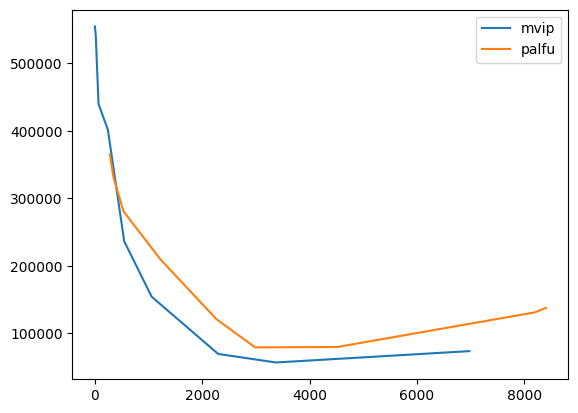

In [20]:
experiment_name = "some"
topology = "abilene"
config_path = "../sim_configs/" + experiment_name + "_config.json"
db_path = "../sim_outputs/" + experiment_name + "_" + topology + "_db.json"
db = getJsonDb(db_path)
fig, ax = plt.subplots()
test_config = getTestConfig(config_path)
input_param_list = simConfigToParamSets(test_config)

filters = [("cache_pol","mvip",None)]
param_list = filterParamList(input_param_list, filters)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, test_config["source_map_seed"], test_config["request_generator_seed"], "delay")
rpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, test_config["source_map_seed"], test_config["request_generator_seed"], "cache_read_penalties")
wpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, test_config["source_map_seed"], test_config["request_generator_seed"], "cache_write_penalties")
ax.plot(np.sum(rpen+wpen,axis=1),res,label="mvip")
#ax.plot(rpen+wpen, res, label="vip2")
#ax.plot([0,0.25,0.5,1,2,5,10,20], res, label="vip2")

filters = [("cache_pol","palfu",None)]
param_list = filterParamList(input_param_list, filters)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, test_config["source_map_seed"], test_config["request_generator_seed"], "delay")
rpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, test_config["source_map_seed"], test_config["request_generator_seed"], "cache_read_penalties")
wpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, test_config["source_map_seed"], test_config["request_generator_seed"], "cache_write_penalties")
ax.plot(np.sum(rpen+wpen,axis=1),res,label="palfu")
#ax.plot(rpen+wpen, res, label="palfu")
#ax.plot([0,0.25,0.5,1,2,5,10,20], res, label="palfu")

ax.legend()